In [1]:
import pandas as pd
import numpy as np


In [11]:
df = pd.DataFrame({'key': ['a','b','c','a','b','c'], 'data':range(6)})
df

,key,data
0,a,0
1,b,1
2,c,2
3,a,3
4,b,4
5,c,5


In [3]:
def filter_by_mean(x):
    return x['data'].mean() > 3
df.groupby('key').mean()


,data
key,
a,1.5
b,2.5
c,3.5


In [9]:
df.groupby('key').filter(filter_by_mean)

,key,data
2,c,2
5,c,5


In [24]:
df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': [1, 2, 3, 1, 2, 3],
    'data2': [4, 4, 6, 0, 6, 1]
})
print("DataFrame:")
print(df, "\n")


DataFrame:
  key  data1  data2
0   A      1      4
1   B      2      4
2   C      3      6
3   A      1      0
4   B      2      6
5   C      3      1 



In [27]:
#key 기준 groupby
print(df.groupby('key').aggregate({'data1': np.sum, 'data2': np.sum}))

     data1  data2
key              
A        2      4
B        4     10
C        6      7


In [30]:
#key, data 기준 groupby

print(df)

print(df.groupby(['key', 'data1']).sum())

print(df.groupby(['key', 'data2']).sum())

  key  data1  data2
0   A      1      4
1   B      2      4
2   C      3      6
3   A      1      0
4   B      2      6
5   C      3      1
           data2
key data1       
A   1          4
B   2         10
C   3          7
           data1
key data2       
A   0          1
    4          1
B   4          2
    6          2
C   1          3
    6          3


In [59]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
    'key': ['A', 'B', 'C', 'A', 'B', 'C'],
    'data1': [0, 1, 2, 3, 4, 5],
    'data2': [4, 4, 6, 0, 6, 1]
})
print("DataFrame:")
print(df, "\n")

# aggregate를 이용하여 요약 통계량을 산출해봅시다.
# 데이터 프레임을 'key' 칼럼으로 묶고, data1과 data2 각각의 최솟값, 중앙값, 최댓값을 출력하세요.
df.groupby('key').aggregate([min,np.median,max])


# 데이터 프레임을 'key' 칼럼으로 묶고, data1의 최솟값, data2의 합계를 출력하세요.
df.groupby('key').aggregate({'data1':np.min, 'data2':np.sum})

DataFrame:
  key  data1  data2
0   A      0      4
1   B      1      4
2   C      2      6
3   A      3      0
4   B      4      6
5   C      5      1 



,data1,data2
key,,
A,0,4
B,1,10
C,2,7


In [60]:
df.groupby('key').aggregate([min,np.median,max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     0    2.0   4
B       1    2.5   4     4    5.0   6
C       2    3.5   5     1    3.5   6

In [61]:
df

,key,data1,data2
0,A,0,4
1,B,1,4
2,C,2,6
3,A,3,0
4,B,4,6
5,C,5,1


In [62]:
df.groupby('key').aggregate(min)

,data1,data2
key,,
A,0,0
B,1,4
C,2,1


In [63]:
df.groupby('key').aggregate([min,np.median,max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     0    2.0   4
B       1    2.5   4     4    5.0   6
C       2    3.5   5     1    3.5   6

In [ ]:
#head() 앞 5개만 보기

In [66]:
#MultiIndex 인덱스 계층을 만드는 것
#a,b 인덱스와 각각 1,2인덱스를 만든다.

df = pd.DataFrame(
    np.random.randn(4,2),
    index = [['a','a','b','b'],['1','2','1','2']],
    columns = ['data1', 'data2'])
df

data1     data2
a 1  0.679898 -1.065696
  2  0.872977 -0.652726
b 1 -0.169387  0.703863
  2  0.432554  0.412164

In [84]:
df = pd.DataFrame(
    np.random.randn(4,4),
    index = [['a','a','b','b'],['1','2','1','2']])
    #columns = ['data1', 'data2','data3','data4'])
df

0         1         2         3
a 1  0.271530 -0.071377 -0.439115  0.269410
  2  0.382892 -0.883536 -1.159012  0.894794
b 1  0.509847  0.289838 -0.064826 -0.030899
  2  0.633844 -0.705970 -0.460263 -0.018837

In [85]:
#columns를 지정해도 계층 지정 됨
df2 = pd.DataFrame(
    np.random.randn(4,4),
    columns = [['a','a','b','b'],['1','2','1','2']])
df2

a                   b          
          1         2         1         2
0  0.006343 -1.073524  0.121115  1.119873
1 -1.545181  1.092768  0.252291  0.315019
2  1.144340 -1.138980 -0.824642 -0.554511
3 -0.368126 -0.490965 -0.889281 -0.945555

In [90]:
#열로 뽑기
df2['a']

,1,2
0,0.006343,-1.073524
1,-1.545181,1.092768
2,1.144340,-1.138980
3,-0.368126,-0.490965


In [93]:
df2['b']['1']

0    0.121115
1    0.252291
2   -0.824642
3   -0.889281
Name: 1, dtype: float64

In [97]:
#행으로 뽑기 df[열][열_1][인덱스]
df2['a']['1'][0]

0.006342919513639964

In [86]:
#df[columns]: Series로 출력
df[0]

a  1    0.271530
   2    0.382892
b  1    0.509847
   2    0.633844
Name: 0, dtype: float64

In [87]:
#df[column][index]로 하나씩 뽑을 수 있음
df[1][0]

-0.07137729233397207

In [98]:
#pivot-table: 데이터에서 필요한 자료만 뽑아서 새롭게 요약,
#분석 할 수 있는 기능 엑셀에서의 피봇 테이블과 같다
#index: 행 인덱스로 들어갈 key
#column: 열 인덱스로 라벨링될 값
#value: 분석할 데이터

In [117]:
df = pd.DataFrame(columns = ['월별','내역','지출(만 원)','수입(만 원)'])
df['월별'] = [201805,201805,201805,201806,201806,201806,
           201807,201807,201807]
df['내역'] = ['관리비','교통비','월급','관리비','교통비','월급',
            '관리비','교통비','월급']
df['지출(만 원)'] = [20, 10, 0, 30, 10, 0, 25, 15, 0]
df['수입(만 원)'] = [0,0,40,0,0,50,0,0,60]
df.pivot_table(index = '월별', columns = '내역',
              values = ['지출(만 원)', '수입(만 원)'])

수입(만 원)         지출(만 원)       
내역         관리비 교통비  월급     관리비 교통비 월급
월별                                   
201805       0   0  40      20  10  0
201806       0   0  50      30  10  0
201807       0   0  60      25  15  0

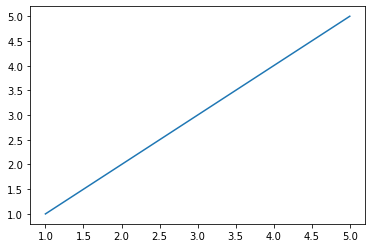

In [123]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [1,2,3,4,5]
plt.plot(x,y)

Text(0, 0.5, 'y')

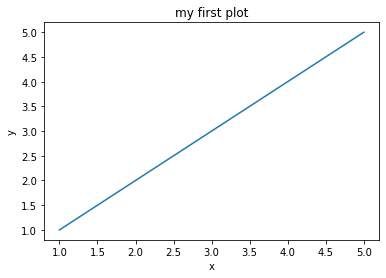

In [126]:
#fig.ax = plt.subplots()

x = [1,2,3,4,5]
y = [1,2,3,4,5]

plt.plot(x,y)
plt.title('my first plot')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

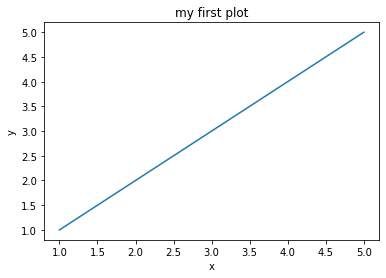

In [130]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]

#이건 복사해놓고 x, y만 수정하면 됨
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_title('my first plot')
ax.set_xlabel('x')
ax.set_ylabel('y')

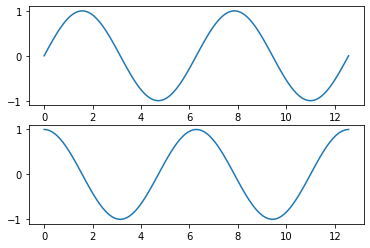

In [134]:
x = np.linspace(0, np.pi*4, 100) #0부터 3.14*4까지 100구간으로 나눠라
fig, axes = plt.subplots(2,1) #2행 1열로 해라
axes[0].plot(x,np.sin(x)) #sin그래프가 axes의 [0]번째
axes[1].plot(x,np.cos(x)) #cos그래프가 axes의 [1]번째

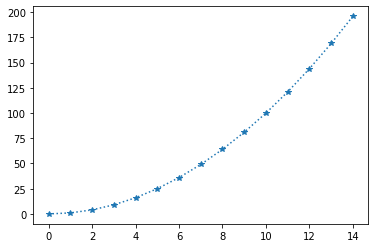

In [142]:
#linestyle, marker, color 활용
fig, ax = plt.subplots()

x = np.arange(15)
y = x**2

ax.plot(
    x,y,
    linestyle = ":",
    marker = "*",
    color = '#1f77b4'
)

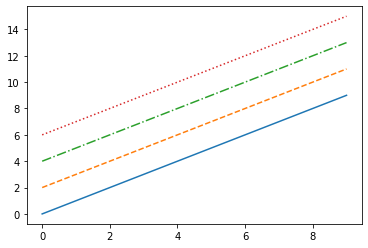

In [143]:
# Line style 

x = np.arange(10)
fig, ax = plt.subplots() #이 줄은 외워라
ax.plot(x, x, linestyle="-") #linestyle의 여러 형태
# solid
ax.plot(x, x+2, linestyle="--") 
# dashed
ax.plot(x, x+4, linestyle="-.")
# dashdot
ax.plot(x, x+6, linestyle=":")
# dotted


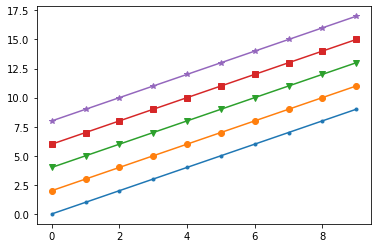

In [144]:
# Marker

x = np.arange(10)
fig, ax = plt.subplots()
ax.plot(x, x, marker=".") #marker의 여러 형태
ax.plot(x, x+2, marker="o") # 큰 원
ax.plot(x, x+4, marker='v') # 아래 삼각형
ax.plot(x, x+6, marker="s") # 사각형(s: square)
ax.plot(x, x+8, marker="*")


(-1.5, 1.5)

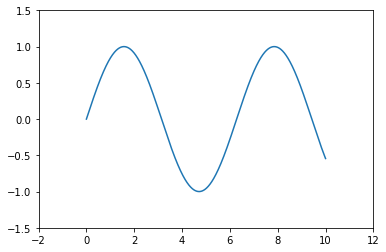

In [151]:
# 축 경계 조정

x = np.linspace(0, 10, 1000) #0부터 10까지 꼭짓점 1000개. 숫자 작으면 각짐
fig, ax = plt.subplots() #걍 외워
ax.plot(x, np.sin(x)) #sin(x)함수를 그린다.
ax.set_xlim(-2, 12) #lim은 limit의 약자, 경계 표현
ax.set_ylim(-1.5,1.5)

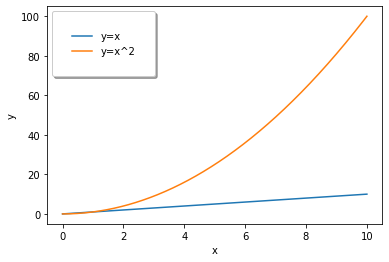

In [153]:
# 범례 

fig, ax = plt.subplots()
ax.plot(x, x, label='y=x') #범례 표시
ax.plot(x, x**2, label='y=x^2') #범례 표시
ax.set_xlabel("x")
ax.set_ylabel("y")

# 범례 데이터 
ax.legend( #legend가 범례란 뜻
    loc='upper left',  # loc : 범례위치
    shadow=True,       # shadow = True 그림자 효과
    fancybox=True,     # fancybox = True 모서리를 둥글게 만든 박스
    borderpad=2)       # borderpad =2     흰색 크기 조정


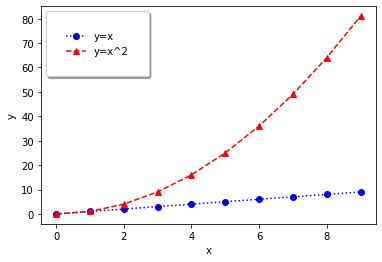

In [154]:
x = np.arange(10)
fig, ax = plt.subplots()
ax.plot(
    x, x, label='y=x', #x, y 인데 y=x라 x, x라 씀
    marker='o',
    color='blue',
    linestyle=':'
)
ax.plot(
    x, x**2, label='y=x^2',
    marker='^',
    color='red',
    linestyle='--'
)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend(
    loc='upper left',
    shadow=True,
    fancybox=True,
    borderpad=2
)

fig.savefig("plot.png") #이 그림을 저장해라 plot.png라는 이름으로


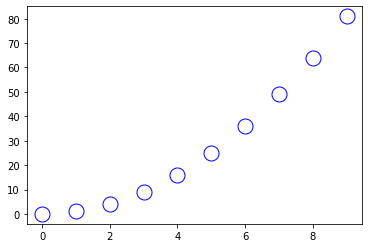

In [159]:
#삼전도 그리기
fig, ax = plt.subplots()

x = np.arange(10)

ax.plot(x, x**2, "o",
       markersize = 15,
       markerfacecolor = 'white',
       markeredgecolor = 'blue')

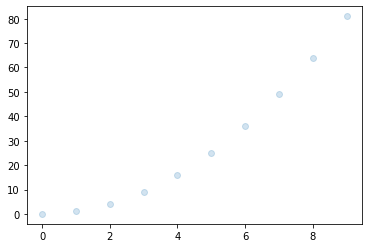

In [165]:
#scatter 함수
fig, ax = plt.subplots()

x = np.arange(10)

ax.scatter(
    x, x**2, alpha=0.2) #alpha는 투명도

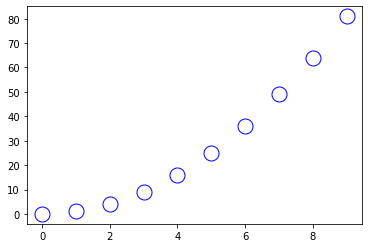

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
x = np.arange(10)
ax.plot(
    x, x**2, "o",
    markersize=15,
    markerfacecolor='white',
    markeredgecolor="blue"
)

fig.savefig("plot.png")


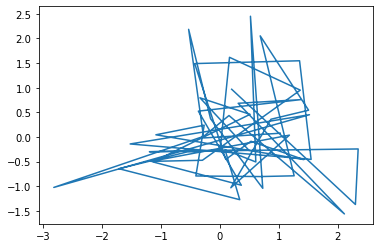

In [16]:
fig, ax = plt.subplots()
x = np.random.randn(50)
y = np.random.randn(50)
colors = np.random.randint(0,100,50)
sizes = 500*np.pi * np.random.randint(50) ** 2
ax.plot(x, y)

<BarContainer object of 10 artists>

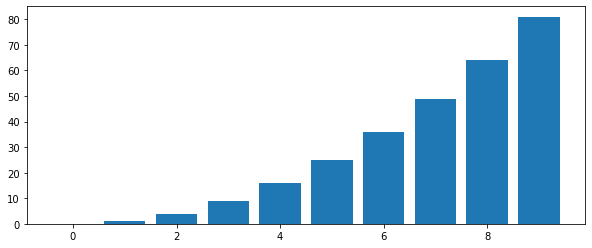

In [175]:
#bar

x = np.arange(10)

fig, ax = plt.subplots(figsize=(10,4)) #figsize는 그래프의 x축 길이, y축 길이

ax.bar(x, x**2)

(array([ 1.,  1.,  0.,  0.,  0.,  3.,  2.,  1.,  1.,  1.,  7.,  7.,  8.,
        12., 12., 10., 23., 29., 26., 25., 41., 36., 43., 62., 43., 39.,
        47., 54., 62., 50., 57., 38., 41., 44., 22., 30., 28., 19., 14.,
         9., 16.,  9., 12.,  5.,  3.,  2.,  2.,  1.,  1.,  1.]),
 array([-3.52531318, -3.39450128, -3.26368938, -3.13287748, -3.00206558,
        -2.87125368, -2.74044178, -2.60962988, -2.47881798, -2.34800609,
        -2.21719419, -2.08638229, -1.95557039, -1.82475849, -1.69394659,
        -1.56313469, -1.43232279, -1.30151089, -1.17069899, -1.03988709,
        -0.90907519, -0.77826329, -0.64745139, -0.51663949, -0.38582759,
        -0.25501569, -0.12420379,  0.00660811,  0.13742001,  0.26823191,
         0.39904381,  0.52985571,  0.66066761,  0.79147951,  0.92229141,
         1.05310331,  1.18391521,  1.31472711,  1.44553901,  1.57635091,
         1.70716281,  1.83797471,  1.96878661,  2.09959851,  2.23041041,
         2.36122231,  2.49203421,  2.62284611,  2.75365801,

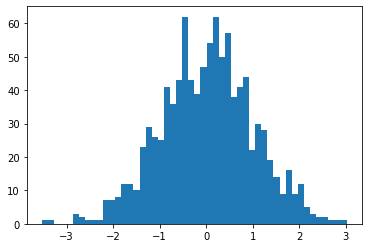

In [177]:
#histogram: data를 bins(구간)별로 나눠서 그래프를 그린다.
#범주형 데이터(구간이 딱딱 나눠진다.)인 bar 그래프와 다르게
#histogram은 분포도(연결돼있다.), 확률형이므로 그래프를 전부 더하면 1이다.

fig, ax = plt.subplots()

data = np.random.randn(1000)
ax.hist(data, bins=50) #bin=50: 50개로 구분해줘

In [178]:
#틀릴 확률이 양쪽 2.5%씩 5%이다.(0.05) 한쪽 틀릴 확률 그래프<0.5이면 x축이 아니라 면적이 0.5보다 작다는 것.
#맞는 확률과 틀릴 확률 분포의 경계는 임계치

C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50556 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\User\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46300 missing from current

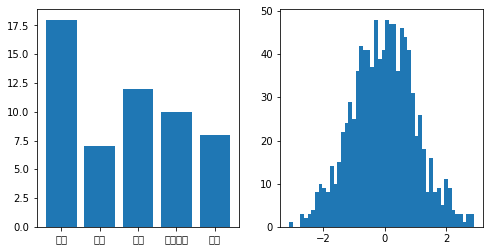

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

x = np.array(["축구", "야구", "농구", "배드민턴", "탁구"])
y = np.array([18, 7, 12, 10, 8])

z = np.random.randn(1000)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Bar 그래프
axes[0].bar(x, y)
# 히스토그램
axes[1].hist(z, bins = 50)


fig.savefig("plot.png")


[Text(0, 0, 'A'), Text(1, 0, 'B'), Text(2, 0, 'C')]

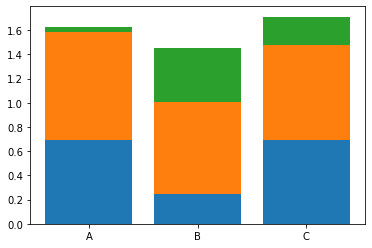

In [10]:
#bar 함수 아이스크림 그래프
x = np.random.rand(3)
y = np.random.rand(3)
z = np.random.rand(3)
data = [x, y, z]
fig, ax = plt.subplots()
x_ax = np.arange(3)
for i in x_ax:
    ax.bar(x_ax, data[i],
    bottom=np.sum(data[:i], axis=0))
ax.set_xticks(x_ax)
ax.set_xticklabels(["A", "B", "C"])